In [ ]:
!pip install kaggle --upgrade
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d laithjj/diabetic-foot-ulcer-dfu

 99% 127M/129M [00:03<00:00, 24.6MB/s]
100% 129M/129M [00:03<00:00, 33.9MB/s]


In [ ]:
!unzip /content/diabetic-foot-ulcer-dfu.zip

Archive:  /content/diabetic-foot-ulcer-dfu.zip
  inflating: DFU/Original Images/1.jpg  
  inflating: DFU/Original Images/1.png  
  inflating: DFU/Original Images/10.jpg  
  inflating: DFU/Original Images/1054877509612379438.jpg  
  inflating: DFU/Original Images/1076771990506636278.jpg  
  inflating: DFU/Original Images/11.jpg  
  inflating: DFU/Original Images/12.jpg  
  inflating: DFU/Original Images/13.jpg  
  inflating: DFU/Original Images/14.jpg  
  inflating: DFU/Original Images/1430965400006561945.jpg  
  inflating: DFU/Original Images/15.jpg  
  inflating: DFU/Original Images/16.jpg  
  inflating: DFU/Original Images/17.JPG  
  inflating: DFU/Original Images/18.jpg  
  inflating: DFU/Original Images/19.jpg  
  inflating: DFU/Original Images/2 (2).jpg  
  inflating: DFU/Original Images/2.jpg  
  inflating: DFU/Original Images/2.png  
  inflating: DFU/Original Images/20.jpg  
  inflating: DFU/Original Images/21.jpg  
  inflating: DFU/Original Images/2100472819858240689.jpg  
  in

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import os

In [ ]:
import cv2

In [ ]:
Ulcer_dir = '/content/DFU/Patches/Abnormal(Ulcer)'
Healthy_dir = '/content/DFU/Patches/Normal(Healthy skin)'

filepaths = []
labels = []

dict_list = [Ulcer_dir, Healthy_dir]

for i,j in enumerate(dict_list):
  flist = os.listdir(j)

  for f in flist:
    fpath = os.path.join(j,f)
    filepaths.append(fpath)

    if i==0:
      labels.append('Ulcer')

    else:
      labels.append('Healthy_Skin')

Fseries = pd.Series(filepaths,name='filepaths')
Lseries = pd.Series(labels,name='labels')

mask_data = pd.concat([Fseries,Lseries], axis=1)
mask_df = pd.DataFrame(mask_data)

print(mask_df.head())

                                      filepaths labels
0  /content/DFU/Patches/Abnormal(Ulcer)/360.jpg  Ulcer
1  /content/DFU/Patches/Abnormal(Ulcer)/464.jpg  Ulcer
2  /content/DFU/Patches/Abnormal(Ulcer)/189.jpg  Ulcer
3  /content/DFU/Patches/Abnormal(Ulcer)/279.jpg  Ulcer
4  /content/DFU/Patches/Abnormal(Ulcer)/415.jpg  Ulcer


In [ ]:
mask_df['labels'].value_counts()

Healthy_Skin    543
Ulcer           512
Name: labels, dtype: int64

In [ ]:
mask_df.shape

(1055, 2)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_images = train_test_split(mask_df,test_size=0.25,random_state = 42)

In [ ]:
test_set, val_set = train_test_split(test_images, test_size=0.25, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
image_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

In [ ]:
Patches_dir = '/content/DFU/Patches'
os.listdir(Patches_dir)

['Normal(Healthy skin)', 'Abnormal(Ulcer)']

In [ ]:
img1 = os.listdir(Patches_dir + '/Normal(Healthy skin)')[0]

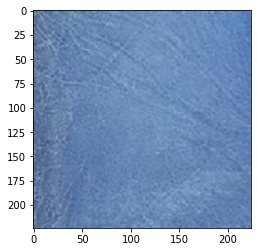

In [ ]:
img1 = Patches_dir + '/Normal(Healthy skin)/' + img1
img1 = cv2.imread(img1)
plt.imshow(img1)

In [ ]:
img1.shape

(224, 224, 3)

In [ ]:
image_shape = (224,224,3)

In [ ]:
batch_size = 8

train_gen = image_gen.flow_from_dataframe(train_set,
                                          x_col='filepaths',
                                          y_col='labels',
                                          target_size=image_shape[:2],
                                          class_mode='binary',
                                          color_mode='rgb',
                                          batch_size=batch_size,
                                          shuffle=False)

Found 791 validated image filenames belonging to 2 classes.


In [ ]:
batch_size = 8

test_gen = image_gen.flow_from_dataframe(test_set,
                                         x_col='filepaths',
                                         y_col='labels',
                                         target_size=image_shape[:2],
                                         class_mode='binary',
                                         color_mode='rgb',
                                         batch_size=batch_size,
                                         shuffle=False)

Found 198 validated image filenames belonging to 2 classes.


In [ ]:
batch_size = 8

val_gen = image_gen.flow_from_dataframe(val_set,
                                        x_col='filepaths',
                                        y_col='labels',
                                        target_size=image_shape[:2],
                                        class_mode='binary',
                                        color_mode='rgb',
                                        batch_size=batch_size,
                                        shuffle=False)

Found 66 validated image filenames belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, BatchNormalization, Dense, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), input_shape =image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 186624)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                11944000  
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5)

In [ ]:
result = model.fit(train_gen, validation_data=val_gen, epochs=20,verbose=1, callbacks=[early_stop])

Epoch 1/20
99/99 [==============================] - 3s 26ms/step - loss: 0.6558 - accuracy: 0.7320 - val_loss: 0.4398 - val_accuracy: 0.7576
Epoch 2/20
99/99 [==============================] - 2s 24ms/step - loss: 0.3629 - accuracy: 0.8584 - val_loss: 0.3361 - val_accuracy: 0.8636
Epoch 3/20
99/99 [==============================] - 2s 24ms/step - loss: 0.2302 - accuracy: 0.9216 - val_loss: 0.2751 - val_accuracy: 0.8788
Epoch 4/20
99/99 [==============================] - 2s 24ms/step - loss: 0.1326 - accuracy: 0.9482 - val_loss: 0.1848 - val_accuracy: 0.9091
Epoch 5/20
99/99 [==============================] - 2s 24ms/step - loss: 0.1596 - accuracy: 0.9368 - val_loss: 0.2535 - val_accuracy: 0.8939
Epoch 6/20
99/99 [==============================] - 2s 24ms/step - loss: 0.1060 - accuracy: 0.9684 - val_loss: 0.2289 - val_accuracy: 0.9242
Epoch 7/20
99/99 [==============================] - 3s 25ms/step - loss: 0.0847 - accuracy: 0.9709 - val_loss: 0.2642 - val_accuracy: 0.8788
Epoch 8/20
99

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.561775,0.731985,0.390948,0.848485
1,0.350124,0.864728,0.446268,0.833333
2,0.287821,0.873578,0.365060,0.833333
3,0.145855,0.945638,0.280969,0.893939
4,0.138695,0.945638,0.273341,0.863636
5,0.082872,0.974716,0.287222,0.833333
6,0.036890,0.991150,0.122705,0.924242
7,0.030858,0.989886,0.144787,0.969697
8,0.074348,0.973451,0.085191,0.954545
9,0.014453,0.998736,0.249724,0.909091


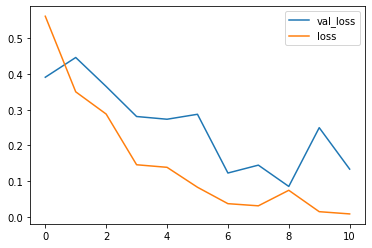

In [ ]:
losses[['val_loss','loss']].plot()

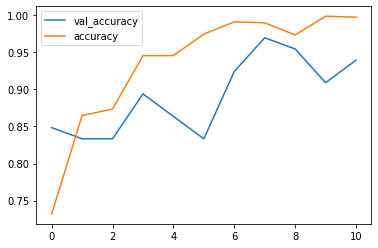

In [ ]:
losses[['val_accuracy','accuracy']].plot()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
pred = model.predict_classes(test_gen)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
pred

array([[1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [ ]:
test_classes = pd.DataFrame(test_gen.classes)

In [ ]:
print(classification_report(test_classes, pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        99
           1       0.97      0.99      0.98        99

    accuracy                           0.98       198
   macro avg       0.98      0.98      0.98       198
weighted avg       0.98      0.98      0.98       198



In [ ]:
print(confusion_matrix(test_classes,pred))

[[96  3]
 [ 1 98]]


In [ ]:
model.save('Diabetic_Foot_Ulcer_using_CNN.h5')

In [ ]:
#using VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
base_model= VGG16(include_top=False,
                  weights='imagenet',
                  input_shape=image_shape)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf

In [ ]:
x = layers.Flatten()(base_model.output)

x = layers.Dense(128, activation='relu')(x)

x = layers.Dropout(0.50)(x)

x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input,x)

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=2)

In [ ]:
result = model.fit(train_image_gen, validation_data=test_image_gen, epochs=20,verbose=1, callbacks=[early_stop])

Epoch 1/20
99/99 [==============================] - 49s 168ms/step - loss: 0.1654 - accuracy: 0.9381 - val_loss: 0.0639 - val_accuracy: 0.9697
Epoch 2/20
99/99 [==============================] - 12s 125ms/step - loss: 0.0459 - accuracy: 0.9899 - val_loss: 0.0416 - val_accuracy: 0.9848
Epoch 3/20
99/99 [==============================] - 12s 126ms/step - loss: 0.0340 - accuracy: 0.9861 - val_loss: 0.0261 - val_accuracy: 0.9848
Epoch 4/20
99/99 [==============================] - 12s 126ms/step - loss: 0.0207 - accuracy: 0.9937 - val_loss: 0.0271 - val_accuracy: 0.9848
Epoch 5/20
99/99 [==============================] - 12s 126ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 6/20
99/99 [==============================] - 12s 126ms/step - loss: 0.0087 - accuracy: 0.9962 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 7/20
99/99 [==============================] - 12s 126ms/step - loss: 0.0111 - accuracy: 0.9975 - val_loss: 0.0162 - val_accuracy: 0.9848

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.165384,0.938053,0.063945,0.969697
1,0.045935,0.989886,0.041607,0.984848
2,0.033992,0.986094,0.026139,0.984848
3,0.020674,0.993679,0.027079,0.984848
4,0.023891,0.992415,0.012860,1.000000
5,0.008740,0.996207,0.013410,1.000000
6,0.011138,0.997472,0.016223,0.984848


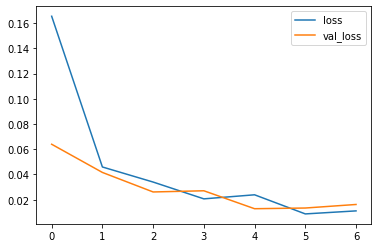

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
preds = model.predict_generator(test_gen)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
preds

array([[9.99973297e-01],
       [9.99290109e-01],
       [9.98997390e-01],
       [1.00000000e+00],
       [9.80836921e-06],
       [1.00000000e+00],
       [2.76477821e-02],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99898791e-01],
       [5.53970267e-06],
       [1.73224264e-03],
       [1.00000000e+00],
       [9.99703467e-01],
       [8.82976165e-05],
       [1.79879426e-05],
       [1.00000000e+00],
       [9.99999881e-01],
       [2.56567034e-07],
       [2.11767056e-05],
       [9.97407377e-01],
       [3.12511074e-05],
       [1.36301736e-04],
       [2.59940736e-02],
       [1.02203321e-05],
       [1.24742210e-05],
       [3.38084355e-05],
       [1.29648479e-05],
       [9.98649703e-05],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99992251e-01],
       [9.33241427e-06],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99994278e-01],


In [ ]:
preds = preds > 0.5

In [ ]:
preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test_gen.classes,preds))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        99
           1       0.97      0.99      0.98        99

    accuracy                           0.98       198
   macro avg       0.98      0.98      0.98       198
weighted avg       0.98      0.98      0.98       198



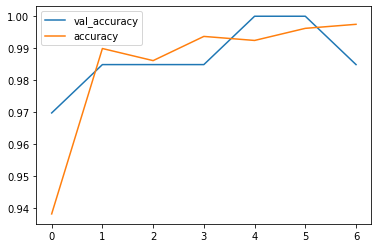

In [ ]:
losses[['val_accuracy','accuracy']].plot()

In [ ]:
model.save('Deabetic_Foot_VGG16.h5')

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_gen.classes,preds)

array([[96,  3],
       [ 1, 98]])